Plots to explain the glitches in robustness test of ResidualAmplitude using EOB waveforms

In [1]:
import sys
sys.path.append("../../")

In [2]:
from measureEccentricity.measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform
from measureEccentricity.plot_settings import use_fancy_plotsettings, colorsDict, figWidthsOneColDict
import matplotlib.pyplot as plt
import numpy as np

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


In [6]:
# We choose a waveform that has very low eccentricity

In [20]:
filepath = "../../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000107150_Momega00.010.h5"
filepath_zeroecc = "../../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000000000_Momega00.002.h5"

In [21]:
waveform_kwargs = {"filepath": filepath,
                   "filepath_zero_ecc": filepath_zeroecc,
                   "include_zero_ecc": True}

In [22]:
dataDict = load_waveform("EOB", **waveform_kwargs)

In [23]:
tref_in = dataDict["t"]

In [24]:
journal = "APS"
use_fancy_plotsettings(journal=journal)

/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:421: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


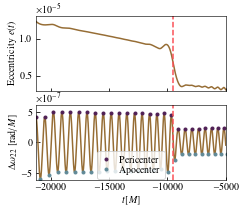

In [65]:
fig, ax = plt.subplots(nrows=2, figsize=(figWidthsOneColDict[journal], 3), sharex=True)
method = "ResidualAmplitude"
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                    dataDict=dataDict,
                                                    method=method,
                                                    return_ecc_method=True)
eccMethod.plot_measured_ecc(fig, ax[0])
ax[0].set_ylim(3e-6, 1.3e-5)
ax[0].set_xlim(tref[0], -5000)
ax[0].set_xlabel("")
ax[0].axvline(-9500, c=colorsDict["vline"], ls="--")
ax[0].grid(False)

ax[1].plot(eccMethod.t, eccMethod.res_omega22, c=colorsDict["default"])
ax[1].plot(eccMethod.t[eccMethod.peaks_location], eccMethod.res_omega22[eccMethod.peaks_location],
           label="Pericenter", ls="", marker=".", c=colorsDict["periastron"])
ax[1].plot(eccMethod.t[eccMethod.troughs_location], eccMethod.res_omega22[eccMethod.troughs_location],
           label="Apocenter", ls="", marker=".", c=colorsDict["apastron"])
ax[1].set_ylabel(r"$\Delta\omega_{22}$ [rad/$M$]")
ax[1].set_xlabel(r"$t [M]$")
ax[1].set_ylim(-6e-7, 6e-7)
ax[1].set_xlim(tref[0], -5000)
ax[1].axvline(-9500, c=colorsDict["vline"], ls="--")
ax[1].legend(loc="lower center", handlelength=1, labelspacing=0.1, borderaxespad=0.1, frameon=True)
#ax.set_xlim(right=-2000)
#ax.set_ylim(0.019, 0.045)
#ax.set_xlabel(r"$t$ [$M$]")
#ax.set_ylabel(r"$\omega_{22}$ [rad/$M$]")

In [66]:
fig.subplots_adjust(left=0.15, bottom=0.13, right=0.94, top=0.94)
fig.savefig("../figs/res_amp_glitches.pdf")